## ROC Plot ##

In [93]:
# Import required modules
import sys
from pathlib import Path

In [94]:
# import project root into modules
project_root = str(Path.cwd().resolve().parent)
if project_root not in sys.path:
    sys.path.append(project_root)

In [95]:
from src.analysis import roc_plot
from src.analysis.efficiency_analysis import load_preprocessed_jobs_dataframe_from_duckdb
from src.config import enum_constants

# Automatically reload modules before executing code
%load_ext autoreload
# Reload all modules imported with %aimport every time before executing the Python code typed.
%autoreload 1
%aimport src.analysis.roc_plot, src.config.enum_constants, src.analysis.efficiency_analysis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
# load jobs df
loaded_df = load_preprocessed_jobs_dataframe_from_duckdb(db_path="../data/slurm_data.db")

Connected to ../data/slurm_data.db
Disconnected from ../data/slurm_data.db


In [ ]:
# initilize the ROCVisualizer instance
roc_instance = roc_plot.ROCVisualizer(jobs_df=loaded_df)

# clip vram_constraint_efficiency to 1

# filter out CPU-only job
filtered_df = roc_instance.filter_jobs_for_analysis(
    gpu_count_filter={"min": 0, "max": float("inf"), "inclusive": False},
    elapsed_seconds_min=0)

# calcualted dataframe with metrics
roc_instance.calculate_all_efficiency_metrics(filtered_df)



### Threshold: alloc_vram_efficiency ###

/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:476: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  


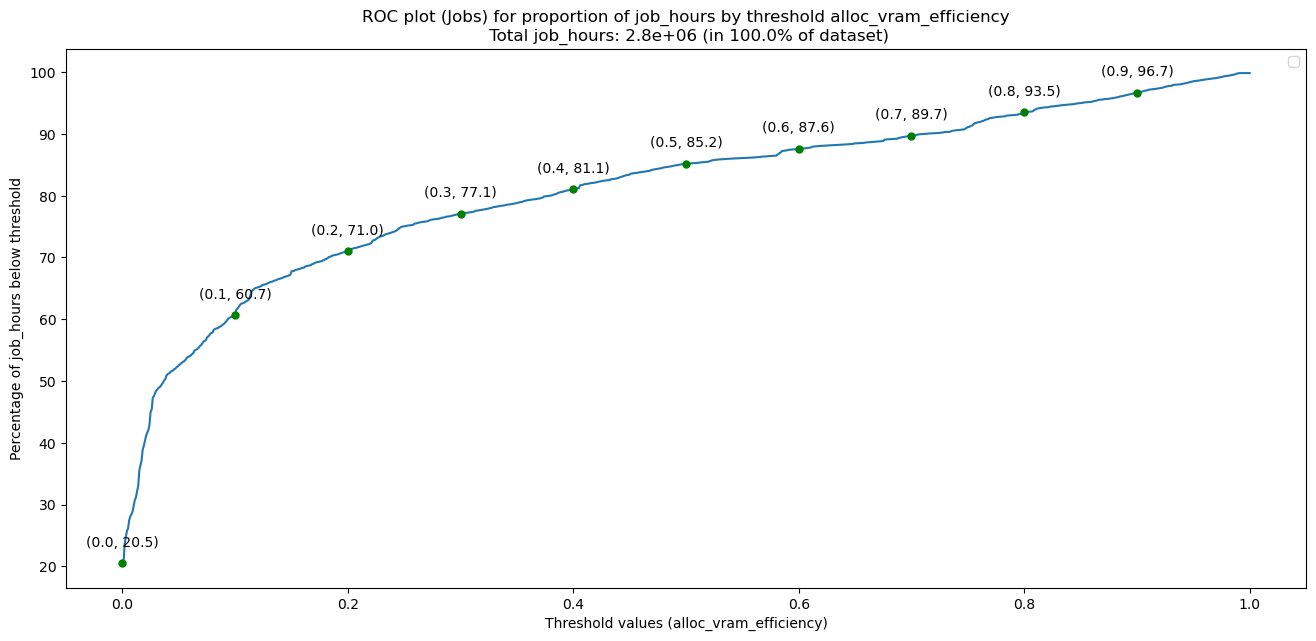

In [97]:
# roc_instance = roc_plot.ROCVisualizer(db_path="../data/slurm_data.db")
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOB_HOURS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=1.0, threshold_step=0.001, threshold_metric=threshold_metric, proportion_metric=proportion_metric
)

In [ ]:
# plot number of jobs by percentage with regard to alloc_vram_effificient
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.001,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=True,
)

In [ ]:
# plot raw numbers of jobs
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=1.0,
    threshold_step=0.001,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False,
)

In [ ]:
# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOB_HOURS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=1.0,
    threshold_step=0.001,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False,
)

### Threshold : vram_constraints_efficiency ###

In [ ]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
df = roc_instance.jobs_with_efficiency_metrics
len(df[df[threshold_metric.value].isna()])

In [ ]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=1.0, threshold_step=0.001, threshold_metric=threshold_metric, proportion_metric=proportion_metric,
    clip_threshold_metric=(True, 1.0)
)

In [ ]:
# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOB_HOURS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=1.0,
    threshold_step=0.001,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

### Threshold : alloc_vram_efficiency_score ###

In [ ]:
# # roc_instance = roc_plot.ROCVisualizer(db_path="../data/slurm_data.db")
# roc_instance = roc_plot.ROCVisualizer(db_path="../data/slurm_data.db")


In [ ]:
# for alloc_vram_efficiency_score, we need to adjust the min_threshold manually

threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=0.0,
    threshold_step=10,
    min_threshold=-10000.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

In [ ]:
print(roc_instance.jobs_with_efficiency_metrics[enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE.value].mean())
print(roc_instance.jobs_with_efficiency_metrics[enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE.value].std())
roc_instance.jobs_with_efficiency_metrics[enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE.value].max()

In [ ]:
# for alloc_vram_efficiency_score, we need to adjust the min_threshold manually

# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc_jobs(
    # min_threshold=-10000,
    max_threshold=0.0,
    threshold_step=100,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

### Threhold metric: Job_hour & vram_hour (For number of jobs only) ###

In [ ]:
print(roc_instance.jobs_with_efficiency_metrics["job_hours"].mean())
print(roc_instance.jobs_with_efficiency_metrics["job_hours"].std())
print(roc_instance.jobs_with_efficiency_metrics["job_hours"].max())
print(roc_instance.jobs_with_efficiency_metrics["job_hours"].min())

In [ ]:
# for alloc_vram_efficiency_score, we need to adjust the min_threshold manually

# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.JOB_HOURS
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
max_job_hour = roc_instance.jobs_with_efficiency_metrics["job_hours"].max()
fig, (axe1) = roc_instance.plot_roc_jobs(
    # min_threshold=-200000,
    min_threshold=0.0,
    max_threshold=50,
    threshold_step=1,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

In [ ]:
print(roc_instance.jobs_with_efficiency_metrics["vram_hours"].mean())
print(roc_instance.jobs_with_efficiency_metrics["vram_hours"].std())
print(roc_instance.jobs_with_efficiency_metrics["vram_hours"].max())
print(roc_instance.jobs_with_efficiency_metrics["vram_hours"].min())

In [ ]:
# for alloc_vram_efficiency_score, we need to adjust the min_threshold manually

# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_HOURS
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
max_job_hour = roc_instance.jobs_with_efficiency_metrics["job_hours"].max()
fig, (axe1) = roc_instance.plot_roc_jobs(
    # min_threshold=-200000,
    min_threshold=0.0,
    max_threshold=490,
    threshold_step=1,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

### Proportion metric : User ###

In [ ]:
null_alloc_vram_efficiency_score = roc_instance.jobs_with_efficiency_metrics[
    roc_instance.jobs_with_efficiency_metrics["alloc_vram_efficiency"].isna()
]

print(
    null_alloc_vram_efficiency_score[
        ["used_vram_gib", "allocated_vram", "alloc_vram_efficiency", "Partition", "GPUType"]
    ]
)

In [ ]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.USERS
fig, (axe1) = roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    threshold_step=0.01,
    max_threshold=1.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False,
)

In [ ]:
user_with_all_vram_score_null = (
    roc_instance.jobs_with_efficiency_metrics.groupby("User")["vram_constraint_efficiency"]
    .apply(lambda x: x.isnull().all())
    .sum()
)
user_with_all_vram_score_null

In [ ]:
# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.USERS
fig, (axe1) = roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    threshold_step=0.01,
    max_threshold=1.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False
)

In [ ]:
# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.USERS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=0.0,
    threshold_step=100,
    min_threshold=-5000.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False
)

### Proportion Metrics: PI_GROUP ###

In [ ]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.PI_GROUPS
fig, (axe1) = roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    threshold_step=0.01,
    max_threshold=1.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False
)

In [ ]:
temp = (
    roc_instance.jobs_with_efficiency_metrics.groupby("Account", observed=True)["vram_constraint_efficiency"]
    .apply(lambda x: x.isnull().all())
    .sum()
)
temp

In [ ]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.PI_GROUPS
fig, (axe1) = roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    threshold_step=0.01,
    max_threshold=1.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False
)

In [ ]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.PI_GROUPS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=0.0,
    threshold_step=10,
    min_threshold=-5000.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False
)

### Proportion Metrics: VRAM_HOURS ###

In [ ]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.VRAM_HOURS

roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.01,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)


In [ ]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.VRAM_HOURS

roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.01,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)


In [ ]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.VRAM_HOURS

roc_instance.plot_roc_jobs(
    max_threshold=0.0,
    # min_threshold=-200000.0,
    threshold_step=1000,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)


## Multiple line plot by user ###

#### Inspect 6 users who submitted the highest number of jobs ####

In [ ]:
top_user_with_job_count = (
    roc_instance.jobs_with_efficiency_metrics.groupby("User")
    .agg(job_count=("JobID", "count"), user_job_hours=("job_hours", "sum"))
    .reset_index()
    .sort_values(by="job_count")
    .tail(6)
)
print(top_user_with_job_count)

In [ ]:
from src.config.enum_constants import ProportionMetricsEnum, JobEfficiencyMetricsEnum

roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_user_with_job_count["User"].to_numpy()),
    object_column_type=ProportionMetricsEnum.USERS,
    threshold_metric=JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY,
    proportion_metric=ProportionMetricsEnum.JOBS,
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.001,
    plot_percentage=False,
)

In [ ]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_user_with_job_count["User"].to_numpy()),
    object_column_type=ProportionMetricsEnum.USERS,
    threshold_metric=JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE,
    proportion_metric=ProportionMetricsEnum.JOBS,
    min_threshold=-10000,
    max_threshold=0.0,
    threshold_step=10,
    plot_percentage=False,
)

In [ ]:
from src.config.enum_constants import ProportionMetricsEnum, JobEfficiencyMetricsEnum

roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_user_with_job_count["User"].to_numpy()),
    # plot_object_list=['dosterman_umass_edu'],
    object_column_type=ProportionMetricsEnum.USERS,
    threshold_metric=JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY,
    plot_percentage=False,
    max_threshold=1.0,
    min_threshold=0.0,
    threshold_step=0.0001,
)

In [ ]:
# Inspect an outliner
cur_df = roc_instance.jobs_with_efficiency_metrics.copy()
filtered = cur_df[cur_df["User"] == "dosterman_umass_edu"].copy()
group = (
    filtered.groupby("User")
    .agg(
        job_count=("JobID", "count"),
        job_hours=("job_hours", "sum"),
        vram_efficiency_score=(JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY.value, "sum"),
        allocated_vram=("allocated_vram", "sum"),
        used_vram=("used_vram_gib", "sum"),
    )
    .reset_index()
)
print(group)

#### Inspect the 6 users with highest number of job_hours ####

In [ ]:
top_user_by_job_hour = (
    roc_instance.jobs_with_efficiency_metrics.groupby("User")
    .agg(job_count=("JobID", "count"), job_hours=("job_hours", "sum"))
    .reset_index()
    .sort_values(by="job_hours")
    .tail(6)
)
print(top_user_by_job_hour)

In [ ]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=top_user_by_job_hour["User"].to_list(),
    object_column_type=ProportionMetricsEnum.USERS,
    threshold_metric=JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY,
    proportion_metric=ProportionMetricsEnum.JOB_HOURS,
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.001,
    plot_percentage=False,
)

In [ ]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=top_user_by_job_hour["User"].to_list(),
    object_column_type=ProportionMetricsEnum.USERS,
    threshold_metric=JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY,
    proportion_metric=ProportionMetricsEnum.JOB_HOURS,
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.001,
    plot_percentage=False,
)

### Multiple plot ROC by PI Group ###

In [ ]:
# from src.analysis.roc_plot import ROCVisualizer

# roc_instance = ROCVisualizer(db_path="../data/slurm_data.db")

In [ ]:
from src.config.enum_constants import ProportionMetricsEnum, JobEfficiencyMetricsEnum

cur_df = roc_instance.jobs_with_efficiency_metrics
top_pi_group_job_counts = (
    cur_df.groupby(ProportionMetricsEnum.PI_GROUPS.value)
    .agg(job_count=("JobID", "count"), job_hours=("job_hours", "sum"))
    .reset_index()
    .sort_values(by="job_count")
    .tail(6)
)
top_pi_group_job_counts

In [ ]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_pi_group_job_counts[ProportionMetricsEnum.PI_GROUPS.value].to_numpy()),
    object_column_type=ProportionMetricsEnum.PI_GROUPS,
    max_threshold=1.0,
    min_threshold=0.0,
    threshold_step=0.001,
    plot_percentage=False,
)

In [ ]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_pi_group_job_counts[ProportionMetricsEnum.PI_GROUPS.value].to_numpy()),
    object_column_type=ProportionMetricsEnum.PI_GROUPS,
    threshold_metric=JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE,
    max_threshold=0.0,
    min_threshold=-100.0,
    threshold_step=1.0,
    plot_percentage=False,
)